# Subscriber classification in retail banking by Machine Learning

In [2]:
import pandas as pd
import numpy as np  #for maths calculation
import seaborn as sea   # 3d visual
import matplotlib.pyplot as plt # basic graph
import warnings  
warnings.filterwarnings("ignore")  #ignore warnings

In [3]:
# Reading the data
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [4]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [5]:
train.head()

ID  age         job   marital  education default  balance housing loan  \
0  26110   56      admin.   married    unknown      no     1933      no   no   
1  40576   31     unknown   married  secondary      no        3      no   no   
2  15320   27    services   married  secondary      no      891     yes   no   
3  43962   57  management  divorced   tertiary      no     3287      no   no   
4  29842   31  technician   married  secondary      no      119     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   

  subscribed  
0         no  
1         no  
2         no  
3        yes  
4         no

In [6]:
train.subscribed

0         no
1         no
2         no
3        yes
4         no
        ... 
31642     no
31643    yes
31644     no
31645     no
31646    yes
Name: subscribed, Length: 31647, dtype: object

In [7]:
train[train['subscribed']=='yes']

ID  age          job   marital  education default  balance housing  \
3      43962   57   management  divorced   tertiary      no     3287      no   
6      40444   56      retired   married  secondary      no     1044      no   
10     14699   36     services  divorced  secondary     yes        0      no   
18     35310   44  blue-collar   married    primary      no     4031     yes   
23     14731   39   management   married   tertiary      no      285     yes   
...      ...  ...          ...       ...        ...     ...      ...     ...   
31611  33754   65   management  divorced   tertiary      no       90     yes   
31622  44152   79      retired  divorced    primary      no     2787      no   
31632   5195   33  blue-collar   married  secondary      no        0     yes   
31643  40178   53   management  divorced   tertiary      no      380      no   
31646  14156   55   management  divorced  secondary      no      204     yes   

      loan    contact  day month  duration  campaign  pdays  previous  \
3       no   cellular   22   jun       867         1     84         3   
6       no  telephone    3   jul       353         2     -1         0   
10     yes   cellular   15   jul       687         7     -1         0   
18      no   cellular    7   may       983         4     -1         0   
23      no   cellular   15   jul       838         3     -1         0   
...    ...        ...  ...   ...       ...       ...    ...       ...   
31611   no   cellular   22   apr       416         1     -1         0   
31622   no  telephone   13   jul       617         1    377         1   
31632   no    unknown   21   may       521         3     -1         0   
31643  yes   cellular    5   jun       438         2     -1         0   
31646   no   cellular   11   jul      1973         2     -1         0   

      poutcome subscribed  
3      success        yes  
6      unknown        yes  
10     unknown        yes  
18     unknown        yes  
23     unknown        yes  
...        ...        ...  
31611  unknown        yes  
31622  success        yes  
31632  unknown        yes  
31643  unknown        yes  
31646  unknown        yes  

[3715 rows x 18 columns]

In [8]:
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [9]:
print(pd.crosstab(train['default'],train['subscribed']))

subscribed     no   yes
default                
no          27388  3674
yes           544    41


In [10]:
df1=train[train['job']=='unemployed']
df1

ID  age         job   marital  education default  balance housing  \
153     9136   36  unemployed    single    primary      no     1201     yes   
159    41839   40  unemployed    single   tertiary      no       79      no   
177     9932   41  unemployed   married   tertiary      no     1666      no   
214    30955   36  unemployed    single  secondary      no      115      no   
227     1229   53  unemployed   married  secondary      no      582     yes   
...      ...  ...         ...       ...        ...     ...      ...     ...   
31497  30482   40  unemployed   married    primary      no     1908     yes   
31547  38410   54  unemployed   married  secondary      no      582     yes   
31554  43193   40  unemployed    single   tertiary      no     7968      no   
31571  29788   32  unemployed    single   tertiary      no     1974      no   
31628  36947   43  unemployed  divorced    primary      no      -70     yes   

      loan   contact  day month  duration  campaign  pdays  previous poutcome  \
153     no   unknown    5   jun        57         1     -1         0  unknown   
159     no  cellular   15   oct       570         1    135         1  failure   
177     no   unknown    9   jun       291         3     -1         0  unknown   
214     no  cellular    9   feb        71         2     -1         0  unknown   
227     no   unknown    8   may        96         2     -1         0  unknown   
...    ...       ...  ...   ...       ...       ...    ...       ...      ...   
31497   no  cellular    5   feb      1661         2     -1         0  unknown   
31547   no  cellular   15   may       693         5    372         2  failure   
31554   no  cellular    2   mar       263         2    180         2  success   
31571   no  cellular    4   feb       775         1     -1         0  unknown   
31628   no  cellular   12   may       124         2     -1         0  unknown   

      subscribed  
153           no  
159          yes  
177           no  
214           no  
227           no  
...          ...  
31497        yes  
31547        yes  
31554        yes  
31571         no  
31628         no  

[905 rows x 18 columns]

In [11]:
df1=df1[train['default']=='yes']
df1

ID  age         job   marital  education default  balance housing  \
1436   30766   46  unemployed  divorced  secondary     yes       22      no   
1919   36399   53  unemployed   married  secondary     yes     -233     yes   
2613   26100   30  unemployed   married  secondary     yes       19      no   
6694    8703   44  unemployed   married  secondary     yes     -505     yes   
7701   25921   33  unemployed   married  secondary     yes     -108     yes   
8534   28581   48  unemployed   married    primary     yes       -6      no   
9634   18002   44  unemployed    single    primary     yes       -4      no   
11896  18776   28  unemployed   married    primary     yes       44     yes   
16320   2280   28  unemployed    single  secondary     yes     -353     yes   
16628   3439   36  unemployed   married  secondary     yes     -318     yes   
17585  25062   47  unemployed   married  secondary     yes        0      no   
20705   8174   34  unemployed  divorced   tertiary     yes       75     yes   
21277  25551   35  unemployed    single  secondary     yes     -126      no   
21492  30841   35  unemployed    single    primary     yes      -84      no   
23354  12477   45  unemployed  divorced    primary     yes     -249     yes   
25276  18645   49  unemployed   married    primary     yes       11     yes   
26444   6580   30  unemployed    single  secondary     yes     -770     yes   
26631  30980   44  unemployed   married    primary     yes      -43     yes   
27280  32137   47  unemployed  divorced  secondary     yes      342     yes   
28210   2366   32  unemployed   married  secondary     yes        2     yes   
29442   8319   55  unemployed   married  secondary     yes     1108     yes   
30808  27027   35  unemployed   married  secondary     yes     1054     yes   

      loan    contact  day month  duration  campaign  pdays  previous  \
1436    no   cellular    6   feb         8        10     -1         0   
1919    no   cellular   11   may       133         3     -1         0   
2613    no   cellular   19   nov       186         5     -1         0   
6694    no    unknown    3   jun       113        11     -1         0   
7701   yes   cellular   19   nov       286         3     -1         0   
8534    no   cellular   29   jan       362         2     -1         0   
9634   yes   cellular   30   jul       788         2     -1         0   
11896   no   cellular   31   jul         6        13     -1         0   
16320   no    unknown   12   may        89         3     -1         0   
16628   no    unknown   15   may       133         2     -1         0   
17585   no   cellular   18   nov        81         2     -1         0   
20705   no    unknown    2   jun        31         3     -1         0   
21277   no   cellular   19   nov       168         1     -1         0   
21492   no   cellular    9   feb        19        11     -1         0   
23354  yes    unknown    1   jul        92         1     -1         0   
25276   no  telephone   31   jul       166         8     -1         0   
26444   no    unknown   28   may        87         1     -1         0   
26631   no   cellular    9   feb       290         6     -1         0   
27280   no   cellular   15   apr       177         1     -1         0   
28210   no    unknown   13   may       178         2     -1         0   
29442  yes    unknown    2   jun        75         4     -1         0   
30808  yes   cellular   21   nov       106         1     -1         0   

      poutcome subscribed  
1436   unknown         no  
1919   unknown         no  
2613   unknown         no  
6694   unknown         no  
7701   unknown         no  
8534   unknown         no  
9634   unknown        yes  
11896  unknown         no  
16320  unknown         no  
16628  unknown         no  
17585  unknown         no  
20705  unknown         no  
21277  unknown         no  
21492  unknown         no  
23354  unknown         no  
25276  unknown         no  
26444  unknown         no  
26631  u

In [12]:
df1=df1[train['marital']=='single']
df1

ID  age         job marital  education default  balance housing  \
9634   18002   44  unemployed  single    primary     yes       -4      no   
16320   2280   28  unemployed  single  secondary     yes     -353     yes   
21277  25551   35  unemployed  single  secondary     yes     -126      no   
21492  30841   35  unemployed  single    primary     yes      -84      no   
26444   6580   30  unemployed  single  secondary     yes     -770     yes   

      loan   contact  day month  duration  campaign  pdays  previous poutcome  \
9634   yes  cellular   30   jul       788         2     -1         0  unknown   
16320   no   unknown   12   may        89         3     -1         0  unknown   
21277   no  cellular   19   nov       168         1     -1         0  unknown   
21492   no  cellular    9   feb        19        11     -1         0  unknown   
26444   no   unknown   28   may        87         1     -1         0  unknown   

      subscribed  
9634         yes  
16320         no  
21277         no  
21492         no  
26444         no

In [13]:
df1=df1[train['subscribed']=='yes']
df1

ID  age         job marital education default  balance housing loan  \
9634  18002   44  unemployed  single   primary     yes       -4      no  yes   

       contact  day month  duration  campaign  pdays  previous poutcome  \
9634  cellular   30   jul       788         2     -1         0  unknown   

     subscribed  
9634        yes

# Univariate Analysis

In [14]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [15]:
df2=train['subscribed'].value_counts(normalize=True)
df2

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

<AxesSubplot:>

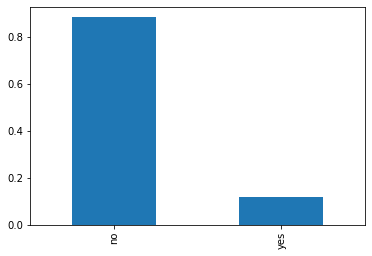

In [16]:
df2.plot.bar()

<AxesSubplot:>

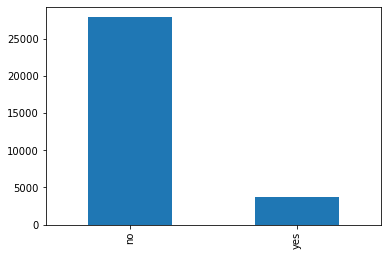

In [17]:
train['subscribed'].value_counts().plot.bar()

<AxesSubplot:xlabel='age', ylabel='Density'>

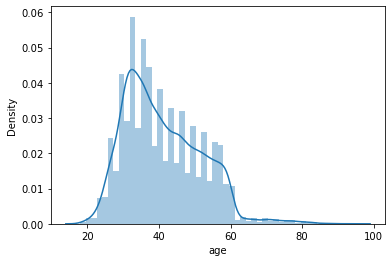

In [18]:
sea.distplot(train["age"])

<AxesSubplot:>

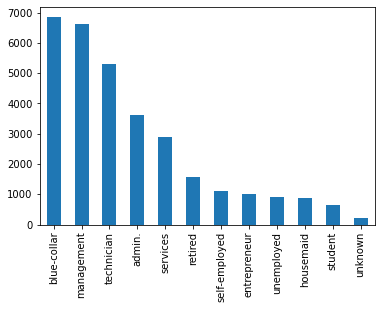

In [19]:
train['job'].value_counts().plot.bar()

<AxesSubplot:>

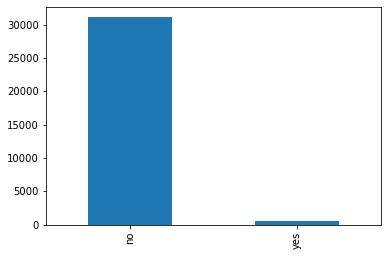

In [20]:
train['default'].value_counts().plot.bar()

# Bivariate Analysis

Text(0, 0.5, 'Percentage')

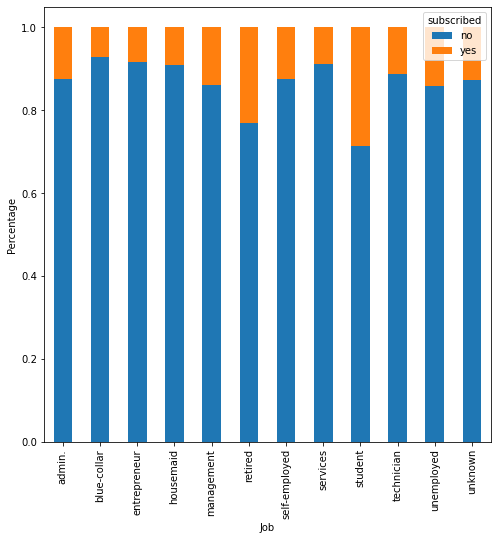

In [21]:
job=(pd.crosstab(train['job'],train['subscribed']))
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')

<AxesSubplot:xlabel='job'>

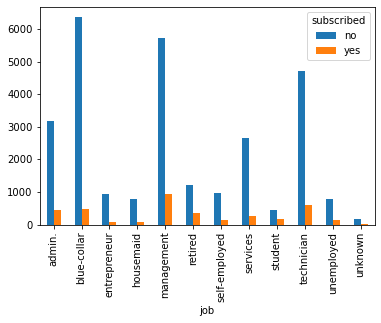

In [22]:
job.plot.bar()

subscribed     no   yes
default                
no          27388  3674
yes           544    41


<AxesSubplot:xlabel='default'>

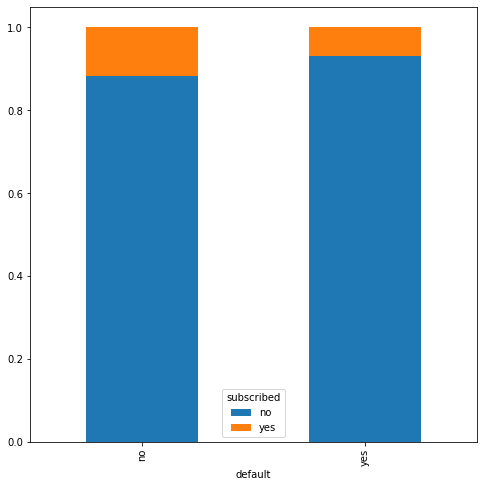

In [23]:
print(pd.crosstab(train['default'],train['subscribed']))
defl=(pd.crosstab(train['default'],train['subscribed']))
defl.div(defl.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True, figsize=(8,8) )

In [24]:
train['subscribed'].replace('no',0,inplace=True)
train['subscribed'].replace('yes',1,inplace=True)

<AxesSubplot:>

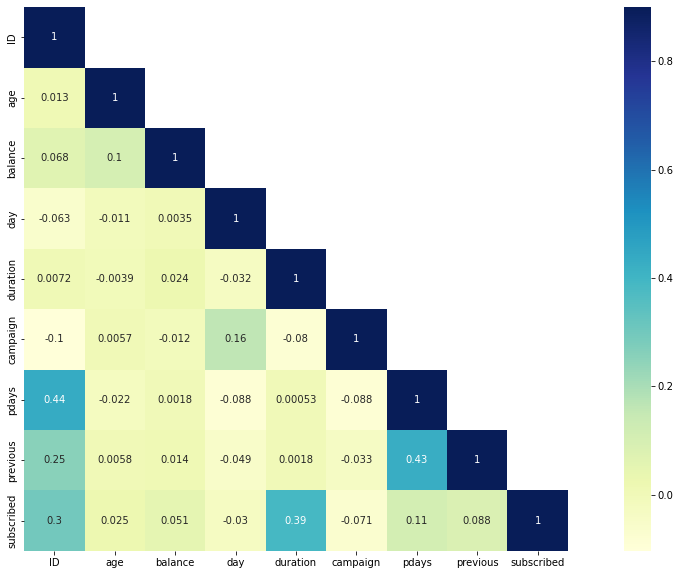

In [25]:
corr=train.corr()
mask=np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sea.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

## Model Building

In [26]:
target=train['subscribed']
train=train.drop('subscribed',1)

In [27]:
train

ID  age         job   marital  education default  balance housing  \
0      26110   56      admin.   married    unknown      no     1933      no   
1      40576   31     unknown   married  secondary      no        3      no   
2      15320   27    services   married  secondary      no      891     yes   
3      43962   57  management  divorced   tertiary      no     3287      no   
4      29842   31  technician   married  secondary      no      119     yes   
...      ...  ...         ...       ...        ...     ...      ...     ...   
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   
31645  38556   57  technician   married  secondary      no      225     yes   
31646  14156   55  management  divorced  secondary      no      204     yes   

      loan    contact  day month  duration  campaign  pdays  previous poutcome  
0       no  telephone   19   nov        44         2     -1         0  unknown  
1       no   cellular   20   jul        91         2     -1         0  unknown  
2       no   cellular   18   jul       240         1     -1         0  unknown  
3       no   cellular   22   jun       867         1     84         3  success  
4       no   cellular    4   feb       380         1     -1         0  unknown  
...    ...        ...  ...   ...       ...       ...    ...       ...      ...  
31642   no   cellular   12   may       116         2     -1         0  unknown  
31643  yes   cellular    5   jun       438         2     -1         0  unknown  
31644   no   cellular    7   aug        37         3     -1         0  unknown  
31645   no  telephone   15   may        22         7    337        12  failure  
31646   no   cellular   11   jul      1973         2     -1         0  unknown  

[31647 rows x 17 columns]

In [28]:
train=pd.get_dummies(train)

In [29]:
train

ID  age  balance  day  duration  campaign  pdays  previous  \
0      26110   56     1933   19        44         2     -1         0   
1      40576   31        3   20        91         2     -1         0   
2      15320   27      891   18       240         1     -1         0   
3      43962   57     3287   22       867         1     84         3   
4      29842   31      119    4       380         1     -1         0   
...      ...  ...      ...  ...       ...       ...    ...       ...   
31642  36483   29        0   12       116         2     -1         0   
31643  40178   53      380    5       438         2     -1         0   
31644  19710   32      312    7        37         3     -1         0   
31645  38556   57      225   15        22         7    337        12   
31646  14156   55      204   11      1973         2     -1         0   

       job_admin.  job_blue-collar  ...  month_jun  month_mar  month_may  \
0               1                0  ...          0          0          0   
1               0                0  ...          0          0          0   
2               0                0  ...          0          0          0   
3               0                0  ...          1          0          0   
4               0                0  ...          0          0          0   
...           ...              ...  ...        ...        ...        ...   
31642           0                0  ...          0          0          1   
31643           0                0  ...          1          0          0   
31644           0                0  ...          0          0          0   
31645           0                0  ...          0          0          1   
31646           0                0  ...          0          0          0   

       month_nov  month_oct  month_sep  poutcome_failure  poutcome_other  \
0              1          0          0                 0               0   
1              0          0          0                 0               0   
2              0          0          0                 0               0   
3              0          0          0                 0               0   
4              0          0          0                 0               0   
...          ...        ...        ...               ...             ...   
31642          0          0          0                 0               0   
31643          0          0          0                 0               0   
31644          0          0          0                 0               0   
31645          0          0          0                 1               0   
31646          0          0          0                 0               0   

       poutcome_success  poutcome_unknown  
0                     0                 1  
1                     0                 1  
2                     0                 1  
3                     1                 0  
4                     0                 1  
...                 ...               ...  
31642                 0                 1  
31643                 0                 1  
31644                 0                 1  
31645                 0                 0  
31646                 0                 1  

[31647 rows x 52 columns]

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# splitting file into 80-20 for test and run
x_train,x_val,y_train,y_val =train_test_split(train, target, test_size = 0.2, random_state=12)

## Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
regr=LogisticRegression()

In [34]:
regr.fit(x_train,y_train)

LogisticRegression()

In [35]:
prediction=regr.predict(x_val)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_val, prediction)

0.8870458135860979

## Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
cls=DecisionTreeClassifier(max_depth=4, random_state=0)

In [40]:
cls.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [41]:
predict=cls.predict(x_val)

In [42]:
accuracy_score(y_val,predict)

0.9042654028436019

# KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier  

In [44]:
knn=KNeighborsClassifier(n_neighbors=2, metric='minkowski', p=2)


In [45]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [46]:
predict_knn = knn.predict(x_val)

In [47]:
accuracy_score(y_val,predict_knn)

0.8903633491311217

## Naive 

In [48]:
from sklearn.naive_bayes import GaussianNB  

In [49]:
nai=GaussianNB()

In [50]:
nai.fit(x_train,y_train)

GaussianNB()

In [51]:
predict_nai=nai.predict(x_val)

In [52]:
accuracy_score(y_val,predict_nai)

0.8513428120063191

# Support Vector

In [53]:
from sklearn.svm import SVC

In [54]:
sup=SVC()

In [55]:
sup

SVC()

In [56]:
sup.fit(x_train,y_train)

SVC()

In [57]:
predict_s=sup.predict(x_val)

In [58]:
accuracy_score(y_val,predict_s)

0.8859399684044234

In [59]:
test = pd.get_dummies(test)

In [60]:
test_prediction = cls.predict(test)

In [61]:
submission = pd.DataFrame()

In [62]:
# creating a Business_Sourced column and saving the predictions in it
submission['ID'] = test['ID']
submission['subscribed'] = test_prediction

In [66]:
submission['subscribed'].replace(0,'no',inplace=True)
submission['subscribed'].replace(1,'yes',inplace=True)

In [67]:
submission.to_csv('Final_output.csv', header=True, index=False)

# Final Outcome of each Algorithm

# 1.Logistic Regression - 0.88
# 2.Decision Tree       - 0.90
# 3.Naive               - 0.85
# 4.Support Vector      - 0.88